In [121]:
                                                       # Handling DATA WITH MORE THAN ONE TABLE

In [51]:
import pandas as pd

# Path to the Excel file
file_path = r"C:\Users\EliteBook\Downloads\Apocolypse Food Prep - Relationship Tutorial.xlsx"

try:
    # Load the Excel file
    xls = pd.ExcelFile(file_path)

    # Dynamically store each sheet in a variable (df1, df2, df3...)
    sheet_dfs = {}
    for i, sheet_name in enumerate(xls.sheet_names):
        df = pd.read_excel(xls, sheet_name=sheet_name)
        sheet_var = f"df{i+1}"
        sheet_dfs[sheet_var] = df
        print(f"Loaded sheet '{sheet_name}' into variable: {sheet_var}")

    # Unpack into separate variables for easy access (df1, df2, df3)
    globals().update(sheet_dfs)

except FileNotFoundError:
    print("Error: Excel file not found at the specified path.")
except Exception as e:
    print(f"An error occurred: {e}")

Loaded sheet 'Apocolypse Store' into variable: df1
Loaded sheet 'Apocolypse Sales' into variable: df2
Loaded sheet 'Customer Information' into variable: df3


In [131]:
df1.head()   #STORE


,Product ID,Product Name,Price,Production Cost
0,10001,Nylon Rope,30.99,13.67
1,10002,Waterproof Matches,7.99,2.89
2,10003,Stainless Steel Axe,45.50,32.45
3,10004,Backpack,39.99,26.92
4,10005,Multitool Survivial Knife,28.99,10.58


In [199]:
 df2.head() #SALES

,Customer ID,Customer,Product ID,Order ID,Units Sold,Date Purchased
0,1234,Uncle Joe's Prep Shop,10006,1904,32,2022-01-01
1,9876,Alex The Analyst Apocolype Preppers,10005,3966,68,2022-01-02
2,2468,Apocolypse Preppers United,10004,7348,69,2022-01-03
3,1357,Prep4Anything Prepping Store,10005,2409,48,2022-01-04
4,1234,Uncle Joe's Prep Shop,10010,2045,70,2022-01-05


In [201]:
df3.head() #CUSTOMER INFORMATION

,Customer ID,Customer,Address,City,State,Zipcode
0,1234,Uncle Joe's Prep Shop,123 Main Street,Dallas,Texas,70571
1,9876,Alex The Analyst Apocolype Preppers,369 Real Avenue,New York,New York,12546
2,2468,Apocolypse Preppers United,444 Four Street,Benson,Minnesota,93873
3,1357,Prep4Anything Prepping Store,927 Apoco Street,Jefferson City,Missouri,34979


In [247]:

# Creating a pivot table
df1_pivot = pd.pivot_table(df1,
                           index='Product Name', 
                           values=['Price', 'Production Cost'],  # ✅ wrap in a list
                           aggfunc='sum')  # You can also use 'mean', 'count', etc.

print(df1_pivot)


                           Price  Production Cost
Product Name                                     
Backpack                   39.99            26.92
Duct Tape                   6.25             4.87
Multitool Survivial Knife  28.99            10.58
N95 Mask                    2.75             1.01
Nylon Rope                 30.99            13.67
Solar Battery Flashlight   26.49            13.41
Stainless Steel Axe        45.50            32.45
Water Purifier             30.25            17.93
Waterproof Matches          7.99             2.89
Weatherproof Jacket        79.99            30.59


In [205]:
df1_pivot.sort_values(["Price"], ascending=False)

,Price,Production Cost
Product Name,,
Weatherproof Jacket,79.99,30.59
Stainless Steel Axe,45.50,32.45
Backpack,39.99,26.92
Nylon Rope,30.99,13.67
Water Purifier,30.25,17.93
Multitool Survivial Knife,28.99,10.58
Solar Battery Flashlight,26.49,13.41
Waterproof Matches,7.99,2.89
Duct Tape,6.25,4.87


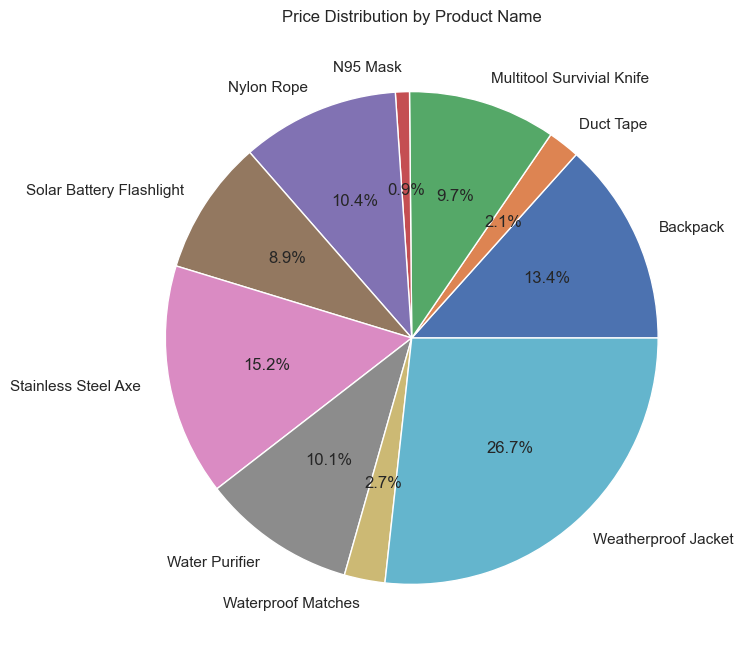

In [253]:
import matplotlib.pyplot as plt

# Plot a pie chart for 'Price'
df1_pivot['Price'].plot.pie(
    autopct='%1.1f%%',
    figsize=(8, 8),
    title='Price Distribution by Product Name',
    ylabel=''  # removes the default y-axis label
)

plt.show()


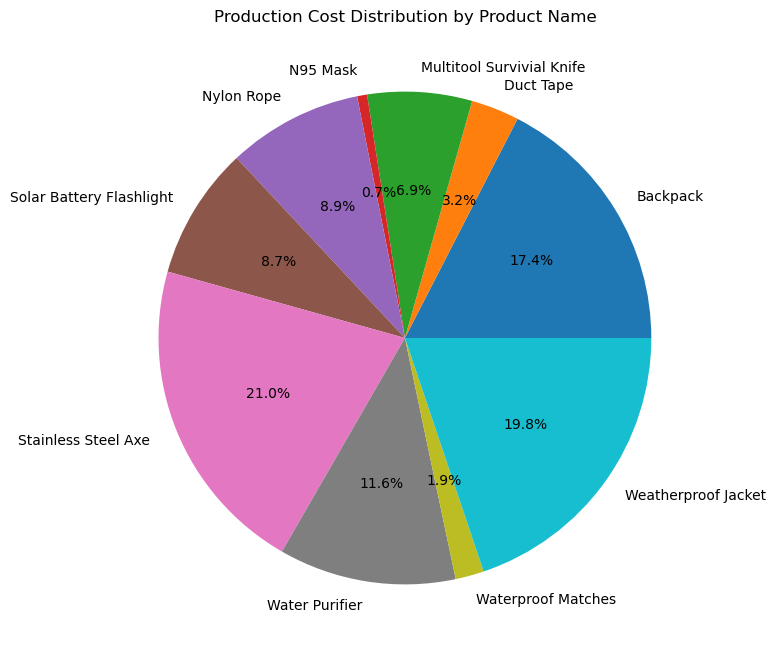

In [175]:
import matplotlib.pyplot as plt

# Plot a pie chart for 'Price'
df1_pivot['Production Cost'].plot.pie(
    autopct='%1.1f%%',
    figsize=(8, 8),
    title='Production Cost Distribution by Product Name',
    ylabel=''  # removes the default y-axis label
)

plt.show()


In [145]:

df2.rename(columns={'Cust ID': 'Customer ID'}, inplace=True)
df2.head()


,Customer ID,Customer,Product ID,Order ID,Units Sold,Date Purchased
0,1234,Uncle Joe's Prep Shop,10006,1904,32,2022-01-01
1,9876,Alex The Analyst Apocolype Preppers,10005,3966,68,2022-01-02
2,2468,Apocolypse Preppers United,10004,7348,69,2022-01-03
3,1357,Prep4Anything Prepping Store,10005,2409,48,2022-01-04
4,1234,Uncle Joe's Prep Shop,10010,2045,70,2022-01-05


In [153]:

#creating  a pivot table 
df2_pivot = pd.pivot_table(df2,
                              index='Customer',      # Group by profession
                                      
                              values='Units Sold',         # Aggregate units sold
                              aggfunc='sum')          # Use mean, can also try 'sum' or 'count'

print(df2_pivot)

                                      Units Sold
Customer                                        
Alex The Analyst Apocolype Preppers          613
Apocolypse Preppers United                   828
Prep4Anything Prepping Store                 609
Uncle Joe's Prep Shop                        951


In [183]:
# Join df1 and df2 on 'Product ID'
df1_df2_join = pd.merge(df1, df2, on='Product ID', how='inner')  # you can also use 'left' or 'outer'

# Display result
print("Joined df1 and df2:")
df1_df2_join.head()

Joined df1 and df2:


,Product ID,Product Name,Price,Production Cost,Customer ID,Customer,Order ID,Units Sold,Date Purchased
0,10001,Nylon Rope,30.99,13.67,1234,Uncle Joe's Prep Shop,1043,67,2022-01-09
1,10001,Nylon Rope,30.99,13.67,2468,Apocolypse Preppers United,6778,23,2022-01-11
2,10001,Nylon Rope,30.99,13.67,2468,Apocolypse Preppers United,1341,66,2022-01-24
3,10001,Nylon Rope,30.99,13.67,1234,Uncle Joe's Prep Shop,7175,5,2022-01-26
4,10001,Nylon Rope,30.99,13.67,9876,Alex The Analyst Apocolype Preppers,3587,48,2022-02-06


In [189]:
dx=df1_df2_join
dx.head()

,Product ID,Product Name,Price,Production Cost,Customer ID,Customer,Order ID,Units Sold,Date Purchased
0,10001,Nylon Rope,30.99,13.67,1234,Uncle Joe's Prep Shop,1043,67,2022-01-09
1,10001,Nylon Rope,30.99,13.67,2468,Apocolypse Preppers United,6778,23,2022-01-11
2,10001,Nylon Rope,30.99,13.67,2468,Apocolypse Preppers United,1341,66,2022-01-24
3,10001,Nylon Rope,30.99,13.67,1234,Uncle Joe's Prep Shop,7175,5,2022-01-26
4,10001,Nylon Rope,30.99,13.67,9876,Alex The Analyst Apocolype Preppers,3587,48,2022-02-06


In [209]:
# Join df2 and df3 on 'Customer ID'
df2_df3_join = pd.merge(df2, df3, on='Customer ID', how="inner")  # again, 'left' or 'outer' as needed

# Display result
print("\nJoined df2 and df3:")
dy=df2_df3_join


Joined df2 and df3:


In [193]:
dy.head()

,Customer ID,Customer_x,Product ID,Order ID,Units Sold,Date Purchased,Customer_y,Address,City,State,Zipcode
0,1234,Uncle Joe's Prep Shop,10006,1904,32,2022-01-01,Uncle Joe's Prep Shop,123 Main Street,Dallas,Texas,70571
1,9876,Alex The Analyst Apocolype Preppers,10005,3966,68,2022-01-02,Alex The Analyst Apocolype Preppers,369 Real Avenue,New York,New York,12546
2,2468,Apocolypse Preppers United,10004,7348,69,2022-01-03,Apocolypse Preppers United,444 Four Street,Benson,Minnesota,93873
3,1357,Prep4Anything Prepping Store,10005,2409,48,2022-01-04,Prep4Anything Prepping Store,927 Apoco Street,Jefferson City,Missouri,34979
4,1234,Uncle Joe's Prep Shop,10010,2045,70,2022-01-05,Uncle Joe's Prep Shop,123 Main Street,Dallas,Texas,70571


In [195]:
dx_dy_join=pd.merge(dx, dy, on='Product ID', how='inner')  # again, 'left' or 'outer' as needed

dz=dx_dy_join

In [197]:
dz.head()

,Product ID,Product Name,Price,Production Cost,Customer ID_x,Customer,Order ID_x,Units Sold_x,Date Purchased_x,Customer ID_y,Customer_x,Order ID_y,Units Sold_y,Date Purchased_y,Customer_y,Address,City,State,Zipcode
0,10001,Nylon Rope,30.99,13.67,1234,Uncle Joe's Prep Shop,1043,67,2022-01-09,1234,Uncle Joe's Prep Shop,1043,67,2022-01-09,Uncle Joe's Prep Shop,123 Main Street,Dallas,Texas,70571
1,10001,Nylon Rope,30.99,13.67,1234,Uncle Joe's Prep Shop,1043,67,2022-01-09,2468,Apocolypse Preppers United,6778,23,2022-01-11,Apocolypse Preppers United,444 Four Street,Benson,Minnesota,93873
2,10001,Nylon Rope,30.99,13.67,1234,Uncle Joe's Prep Shop,1043,67,2022-01-09,2468,Apocolypse Preppers United,1341,66,2022-01-24,Apocolypse Preppers United,444 Four Street,Benson,Minnesota,93873
3,10001,Nylon Rope,30.99,13.67,1234,Uncle Joe's Prep Shop,1043,67,2022-01-09,1234,Uncle Joe's Prep Shop,7175,5,2022-01-26,Uncle Joe's Prep Shop,123 Main Street,Dallas,Texas,70571
4,10001,Nylon Rope,30.99,13.67,1234,Uncle Joe's Prep Shop,1043,67,2022-01-09,9876,Alex The Analyst Apocolype Preppers,3587,48,2022-02-06,Alex The Analyst Apocolype Preppers,369 Real Avenue,New York,New York,12546


,Price,Production Cost,Units Sold_x
Product Name,,,
Backpack,999.75,673.00,1060
Duct Tape,506.25,394.47,3285
Multitool Survivial Knife,4899.31,1788.02,6201
N95 Mask,176.00,64.64,2744
Nylon Rope,2510.19,1107.27,3510


In [225]:
# Create a new column 'profit'
dz['Profit'] = (dz['Price'] * dz['Units Sold_x']) - dz['Production Cost']


In [227]:
dz.head()

,Product ID,Product Name,Price,Production Cost,Customer ID_x,Customer,Order ID_x,Units Sold_x,Date Purchased_x,Customer ID_y,Customer_x,Order ID_y,Units Sold_y,Date Purchased_y,Customer_y,Address,City,State,Zipcode,Profit
0,10001,Nylon Rope,30.99,13.67,1234,Uncle Joe's Prep Shop,1043,67,2022-01-09,1234,Uncle Joe's Prep Shop,1043,67,2022-01-09,Uncle Joe's Prep Shop,123 Main Street,Dallas,Texas,70571,2062.66
1,10001,Nylon Rope,30.99,13.67,1234,Uncle Joe's Prep Shop,1043,67,2022-01-09,2468,Apocolypse Preppers United,6778,23,2022-01-11,Apocolypse Preppers United,444 Four Street,Benson,Minnesota,93873,2062.66
2,10001,Nylon Rope,30.99,13.67,1234,Uncle Joe's Prep Shop,1043,67,2022-01-09,2468,Apocolypse Preppers United,1341,66,2022-01-24,Apocolypse Preppers United,444 Four Street,Benson,Minnesota,93873,2062.66
3,10001,Nylon Rope,30.99,13.67,1234,Uncle Joe's Prep Shop,1043,67,2022-01-09,1234,Uncle Joe's Prep Shop,7175,5,2022-01-26,Uncle Joe's Prep Shop,123 Main Street,Dallas,Texas,70571,2062.66
4,10001,Nylon Rope,30.99,13.67,1234,Uncle Joe's Prep Shop,1043,67,2022-01-09,9876,Alex The Analyst Apocolype Preppers,3587,48,2022-02-06,Alex The Analyst Apocolype Preppers,369 Real Avenue,New York,New York,12546,2062.66


In [229]:
#creating  a pivot table 
dz_pivot = pd.pivot_table(dz,
                              index='Product Name',      # Group by product name
                                      
                              values=['Units Sold_x', 'Production Cost' ,'Price' , 'Profit'],       # Aggregate units sold
                              aggfunc='sum')          # Use mean, can also try 'sum' or 'count'

dz_pivot.head()

,Price,Production Cost,Profit,Units Sold_x
Product Name,,,,
Backpack,999.75,673.00,41716.40,1060
Duct Tape,506.25,394.47,20136.78,3285
Multitool Survivial Knife,4899.31,1788.02,177978.97,6201
N95 Mask,176.00,64.64,7481.36,2744
Nylon Rope,2510.19,1107.27,107667.63,3510


In [231]:
dz_pivot.sort_values(by="Profit", ascending=False)

,Price,Production Cost,Profit,Units Sold_x
Product Name,,,,
Multitool Survivial Knife,4899.31,1788.02,177978.97,6201
Weatherproof Jacket,3919.51,1498.91,146882.54,1855
Stainless Steel Axe,3685.50,2628.45,140696.55,3150
Nylon Rope,2510.19,1107.27,107667.63,3510
Backpack,999.75,673.00,41716.40,1060
Solar Battery Flashlight,953.64,482.76,28444.32,1092
Water Purifier,484.00,286.88,27180.12,908
Duct Tape,506.25,394.47,20136.78,3285
N95 Mask,176.00,64.64,7481.36,2744


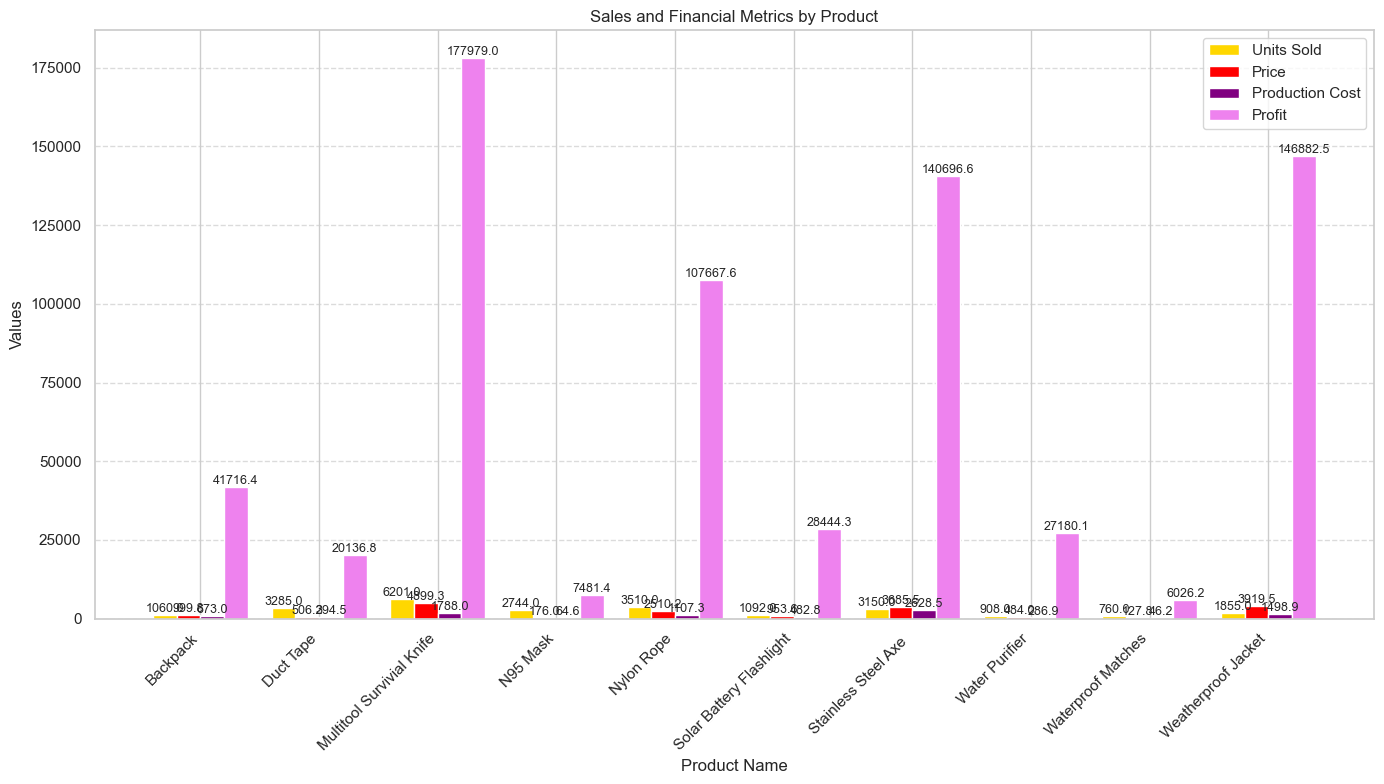

In [257]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size
plt.figure(figsize=(14, 8))

# Create x-axis labels and positions
products = dz_pivot.index
x = np.arange(len(products))  # label locations
width = 0.2  # width of each bar

# Define the bar values
units_sold = dz_pivot['Units Sold_x']
price = dz_pivot['Price']
production_cost = dz_pivot['Production Cost']
profit = dz_pivot['Profit']

# Plot the bars
bars1 = plt.bar(x - 1.5 * width, units_sold, width, label='Units Sold', color='gold')
bars2 = plt.bar(x - 0.5 * width, price, width, label='Price', color='red')
bars3 = plt.bar(x + 0.5 * width, production_cost, width, label='Production Cost', color='purple')
bars4 = plt.bar(x + 1.5 * width, profit, width, label='Profit', color='violet')

# Function to add labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            height + 0.5, 
            f'{height:.1f}', 
            ha='center', va='bottom', fontsize=9
        )

# Add value labels to each set of bars
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

# Add labels and title
plt.xlabel('Product Name')
plt.ylabel('Values')
plt.title('Sales and Financial Metrics by Product')
plt.xticks(x, products, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()